In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

# URL of the zip file containing the dataset
zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'

# Download the zip file and extract it
response = requests.get(zip_url)
with zipfile.ZipFile(BytesIO(response.content)) as zip_file:
    zip_file.extractall()

# Load the dataset from the extracted file
csv_file = 'bank-additional/bank-additional-full.csv'
bank_data = pd.read_csv(csv_file, sep=';')

# Display the first few rows and columns of the dataset
print(bank_data.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [4]:
# Convert categorical variables to numerical using one-hot encoding
bank_data = pd.get_dummies(bank_data, drop_first=True)

# Split data into features (X) and target variable (y)
X = bank_data.drop('y_yes', axis=1)  # Features
y = bank_data['y_yes']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [6]:
# Predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report and confusion matrix
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8868657441126487
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      7303
        True       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238

Confusion Matrix:
[[6817  486]
 [ 446  489]]


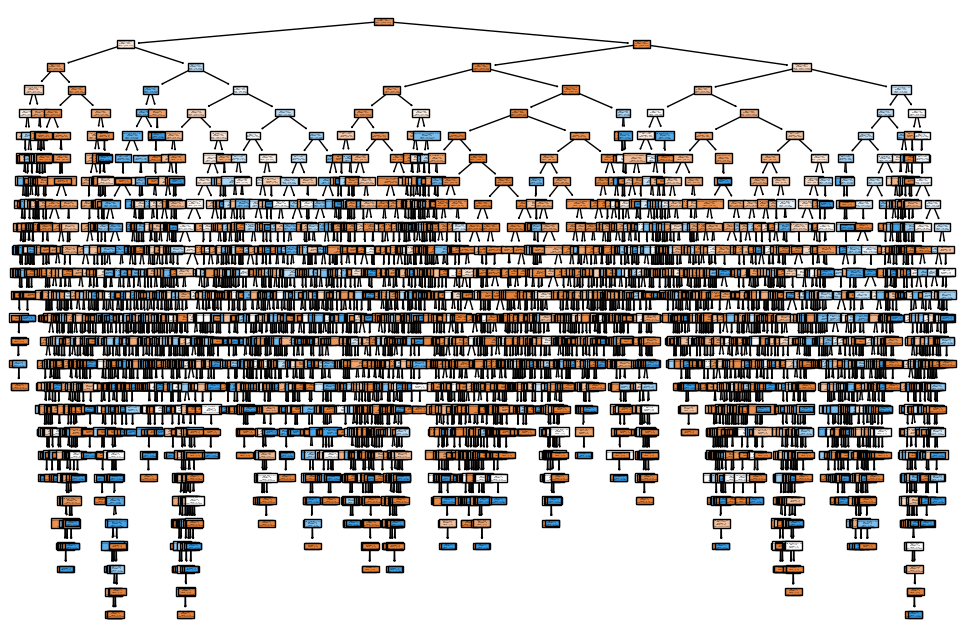

In [9]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.show()


In [10]:
# Handle missing values (if any)
bank_data.dropna(inplace=True)  # Assuming you want to drop rows with missing values

# Encode categorical variables using one-hot encoding
bank_data = pd.get_dummies(bank_data, drop_first=True)

# Feature scaling (optional, depending on the algorithm used)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(bank_data.drop('y_yes', axis=1))
bank_data_scaled = pd.DataFrame(scaled_features, columns=bank_data.columns[:-1])
bank_data_scaled['y_yes'] = bank_data['y_yes']


In [11]:
from sklearn.model_selection import train_test_split
X = bank_data_scaled.drop('y_yes', axis=1)
y = bank_data_scaled['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 0.8866229667394999
              precision    recall  f1-score   support

       False       0.94      0.93      0.94      7303
        True       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



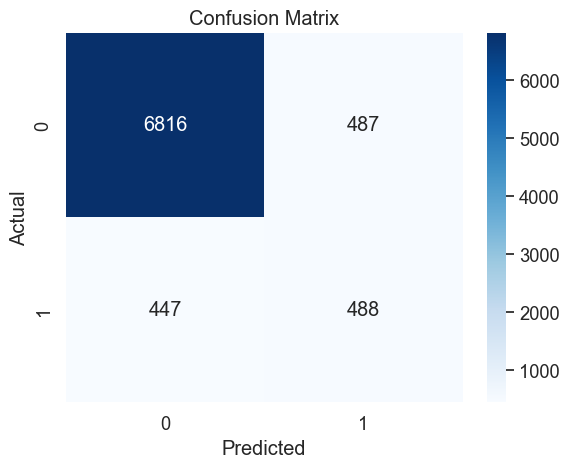

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = clf.predict(X_test)

# Print accuracy and classification report
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
import seaborn as sns
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


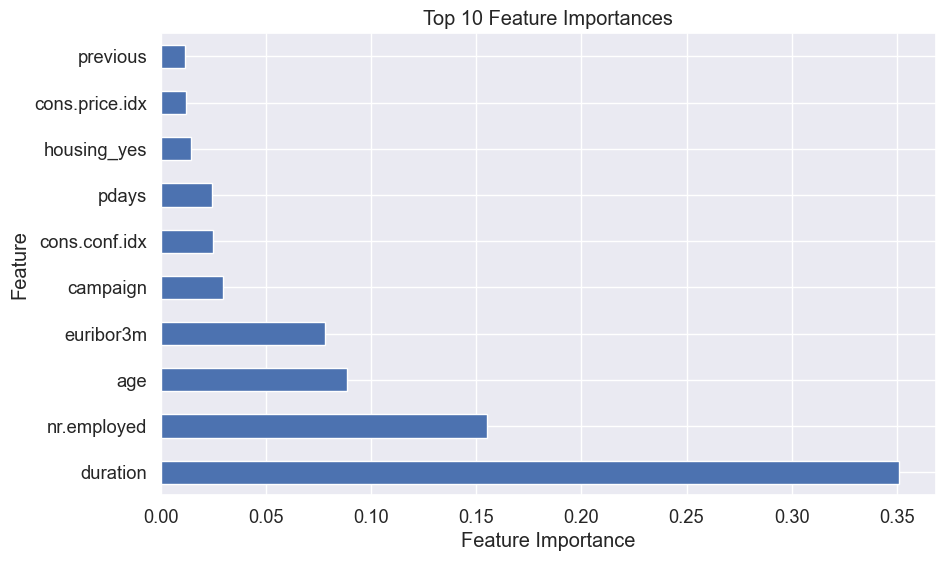

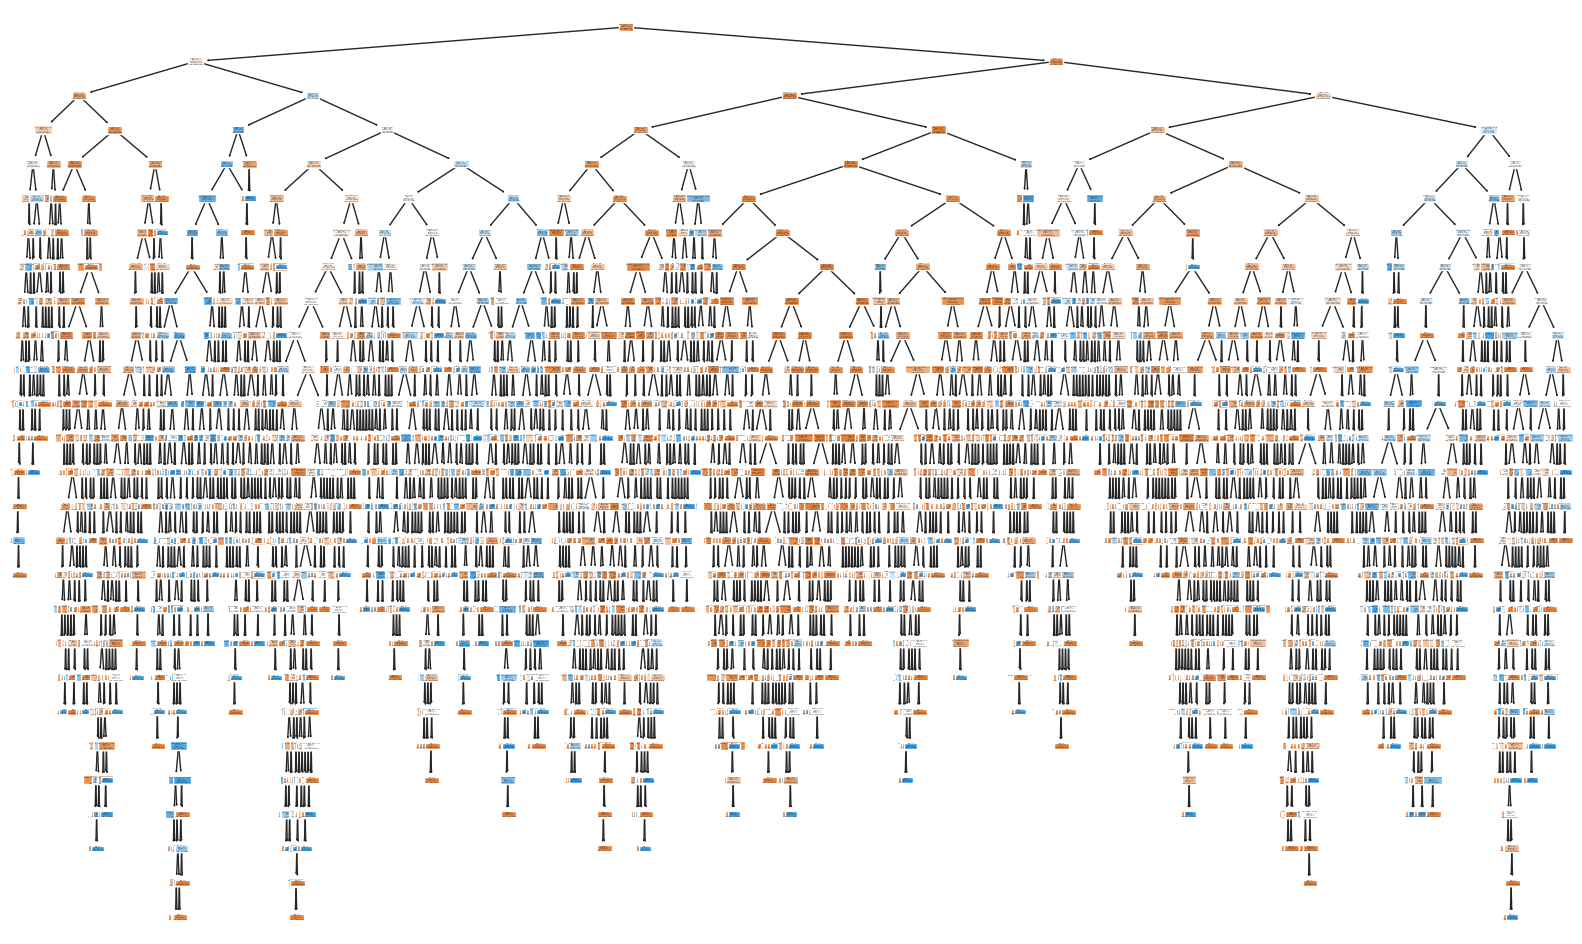

In [14]:
# Plotting feature importances (for decision tree)
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()

# Visualize the decision tree (optional)
plt.figure(figsize=(20, 12))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.show()
